<a href="https://colab.research.google.com/github/Taeho-Kim-0322/Deep_Learning_Start/blob/master/%EC%8B%A4%EC%8A%B5_3_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

In [ ]:
import tensorflow as tf 

from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential

아래 코드는 Learning curve를 그리는 기능을 수행합니다

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(9,6))

  for history in histories:
    plt.plot(history.epoch, history.history['accuracy'], label='training')
    plt.plot(history.epoch, history.history['val_accuracy'], label='validation')

  plt.xlabel('Epochs')
  plt.ylabel('ACC')
  plt.legend()

  plt.xlim([0,max(history.epoch)])

MNIST 데이터 로드


In [ ]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

11493376/11490434 [==============================] - 0s 0us/step


# 실습 MISSION
### 기준모델을 만들어 다양한 regularization 적용하기

* hidden size 1024짜리 Dense레이어 5층 쌓기
* Activation으로 ReLU 이용
* 출력 Dense레이어에서 softmax 활용하여 10개 숫자 분류


Epoch 1/25
196/196 [==============================] - 2s 12ms/step - loss: 0.2728 - accuracy: 0.9151 - val_loss: 0.1330 - val_accuracy: 0.9577
Epoch 2/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0982 - accuracy: 0.9708 - val_loss: 0.0950 - val_accuracy: 0.9718
Epoch 3/25
196/196 [==============================] - 2s 10ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.1023 - val_accuracy: 0.9718
Epoch 4/25
196/196 [==============================] - 2s 10ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0941 - val_accuracy: 0.9750
Epoch 5/25
196/196 [==============================] - 2s 11ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0867 - val_accuracy: 0.9774
Epoch 6/25
196/196 [==============================] - 2s 10ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0942 - val_accuracy: 0.9778
Epoch 7/25
196/196 [==============================] - 2s 10ms/step - loss: 0.0330 - accuracy: 0.9904 - val_loss: 0.0839 - val_accuracy: 0.9766

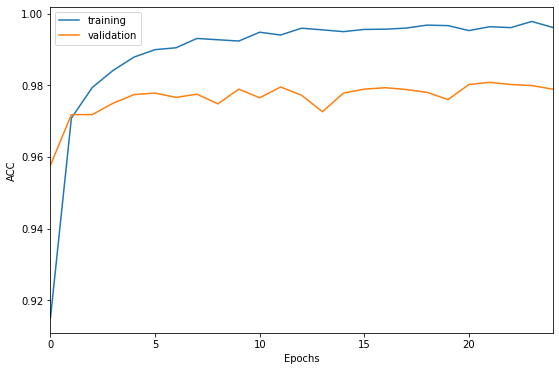

In [ ]:
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)

plot_history([history])

### Early stopping 구현하기

위 작성한 모델을 복사해오기, 50 epoch동안 학습하도록 수정

매 epoch마다 validation accuracy의 개선이 없으면 학습을 거기서 중단하도록 하자!

몇 번 봐줄까? --> patience 옵션을 통해 조절

* 한번이라도 정확도가 감소하면 바로 stop!
* 두번은 봐주자! 연속 두번 감소하면 그때 stop!
* ...

tf.keras.callbacks.EarlyStopping 기능 활용,
매 epoch마다 지정한 metric을 기준으로 early stopping을 선정 가능

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 0.2715 - accuracy: 0.9147 - val_loss: 0.1493 - val_accuracy: 0.9534
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.1031 - val_accuracy: 0.9701
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0665 - accuracy: 0.9800 - val_loss: 0.0970 - val_accuracy: 0.9723
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0957 - val_accuracy: 0.9735
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0864 - val_accuracy: 0.9786
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0937 - val_accuracy: 0.9768
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0907 - val_accuracy: 0.9786

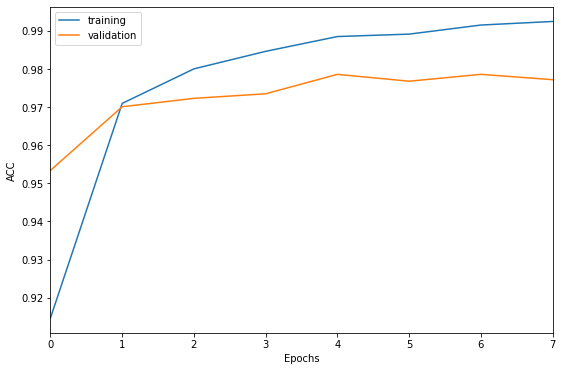

In [ ]:
model = tf.keras.models.Sequential([
Flatten(input_shape=(28, 28, 1)),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(1024, activation='relu'),
Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 3)  # 빈칸을 채워봅시다!

history = model.fit(x_train, y_train, batch_size=256, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stop], verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])

### Capacity 조정 및 Dropout 구현하기

기준 모델을 복사해오기

hidden 2층과 output layer만 남기기

Dropout layer 활용, 레이어 사이마다 50% dropout 적용하기

Epoch 1/25
196/196 [==============================] - 2s 10ms/step - loss: 0.3378 - accuracy: 0.8966 - val_loss: 0.1202 - val_accuracy: 0.9641
Epoch 2/25
196/196 [==============================] - 2s 8ms/step - loss: 0.1453 - accuracy: 0.9551 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 3/25
196/196 [==============================] - 1s 8ms/step - loss: 0.1106 - accuracy: 0.9654 - val_loss: 0.0840 - val_accuracy: 0.9757
Epoch 4/25
196/196 [==============================] - 1s 8ms/step - loss: 0.0886 - accuracy: 0.9722 - val_loss: 0.0737 - val_accuracy: 0.9777
Epoch 5/25
196/196 [==============================] - 1s 8ms/step - loss: 0.0802 - accuracy: 0.9758 - val_loss: 0.0697 - val_accuracy: 0.9796
Epoch 6/25
196/196 [==============================] - 2s 8ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0739 - val_accuracy: 0.9778
Epoch 7/25
196/196 [==============================] - 2s 8ms/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0743 - val_accuracy: 0.9801
Epoch

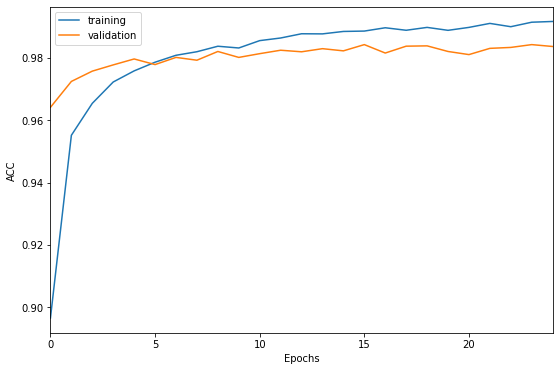

In [ ]:
# 필요한 기능을 import합니다
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential([
Flatten(input_shape=(28, 28, 1)),
Dense(1024, activation='relu'),
Dropout(0.5),
Dense(1024, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

history = model.fit(x_train, y_train, batch_size=256, epochs=25, validation_data=(x_val, y_val), verbose=1)
result = model.evaluate(x_test,  y_test, verbose=2)
plot_history([history])